In [ ]:
from google.colab import drive
import pandas as pd        
drive.mount('/content/drive')

path = "/content/drive/My Drive/Bitcoin.csv"
data = pd.read_csv(path)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3024,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
3025,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
3026,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
3027,2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456


الف) محاسبه میانگین درطول زمان

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
total_sum = 0
original_plot= []
expanding_mean_plot= []

for i in range(0,len(data)):

    value = np.log(data.loc[i,'Close'])
    total_sum = total_sum + value
    original_plot.append(value)
    expanding_mean_plot.append(total_sum/(i+1))

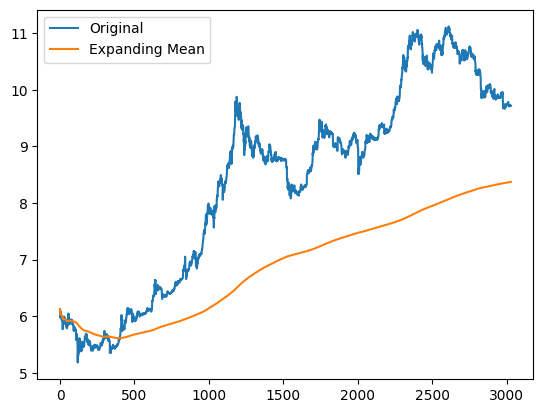

In [ ]:
plt.plot(original_plot, label='Original')
plt.plot(expanding_mean_plot, label='Expanding Mean')
plt.legend(loc='best')
plt.show()

ب) در این قسمت هر دو روش برای بررسی پیاده سازی شده است ولی روش مناسب تر روش دوم میباشد

محاسبه میانگین با پنجره ای با طول ثابت

In [ ]:
avg_sliding_widow_plot=[]

In [ ]:
def avg_sliding_widow(data, c_size):

   c = [0]*c_size
   total_sum = 0

   for i in range(0,len(data)):

      value = np.log(data.loc[i,'Close'])
      old_value = c.pop(0)

      c.append(value)
      total_sum = total_sum + value
      total_sum = total_sum - old_value

      if i < c_size :
        avg_sliding_widow_plot.append(total_sum/(i+1))
      else:
        avg_sliding_widow_plot.append(total_sum/c_size)

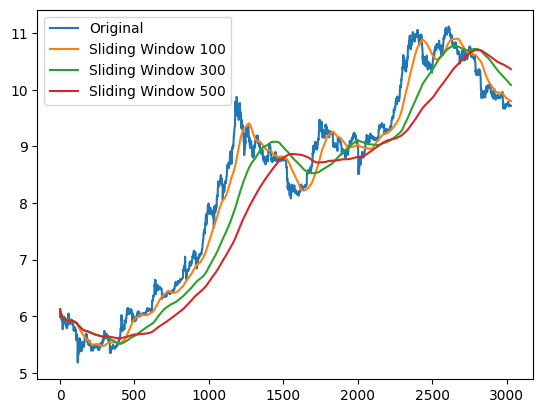

In [ ]:

plt.plot(original_plot, label='Original')

avg_sliding_widow_plot=[]
avg_sliding_widow(data, 100)
plt.plot(avg_sliding_widow_plot, label='Sliding Window 100')

avg_sliding_widow_plot=[]
avg_sliding_widow(data, 300)
plt.plot(avg_sliding_widow_plot, label='Sliding Window 300')

avg_sliding_widow_plot=[]
avg_sliding_widow(data, 500)
plt.plot(avg_sliding_widow_plot, label='Sliding Window 500')

plt.legend()
plt.show()

محاسبه میانگین به صورت وزن دار

In [ ]:
weighted_mean_plot = []

In [ ]:
def calculate_weighted_mean(data,stepsize):
  total_sum = 0
  q = (1-stepsize)

  for i in range(0,len(data)):

    value = np.log(data.loc[i,'Close'])
    total_sum = (total_sum*q) + value
    total_weight = (1-pow(q,(i+1)))/(1-q)
    
    weighted_mean_plot.append(total_sum/total_weight)

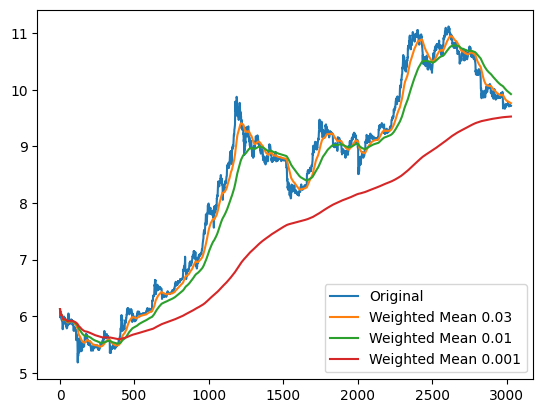

In [ ]:
plt.plot(original_plot, label='Original')

weighted_mean_plot = []
calculate_weighted_mean(data,0.03)
plt.plot(weighted_mean_plot, label='Weighted Mean 0.03')



weighted_mean_plot = []
calculate_weighted_mean(data,0.01)
plt.plot(weighted_mean_plot, label='Weighted Mean 0.01')


weighted_mean_plot = []
calculate_weighted_mean(data,0.001)
plt.plot(weighted_mean_plot, label='Weighted Mean 0.001')

plt.legend(loc='best')
plt.show()

ج)

پیدا کردن محل تغییر توزیع داده

In [138]:
y_outlier_plot=[]

In [195]:
def calculate_variance(data,c,threshold):
  q = 1-c
  sliding_window = []
  current_variance = 0  
  sum_variance = 0

  for i in range(0,len(data)):

    value = np.log(data.loc[i,'Close'])
    
    if i<8:
      sliding_window.append(value)
    else:
      sliding_window.pop(0)
      sliding_window.append(value)

    current_variance = np.var(sliding_window)

    sum_variance = (sum_variance*q) + current_variance
    total_weight = (1-pow(q,(i+1)))/(1-q)
    mean_variance = sum_variance / total_weight

    if abs(current_variance) > threshold * mean_variance :
      y_outlier_plot.append(value+0.5)
    else:
      y_outlier_plot.append(None)

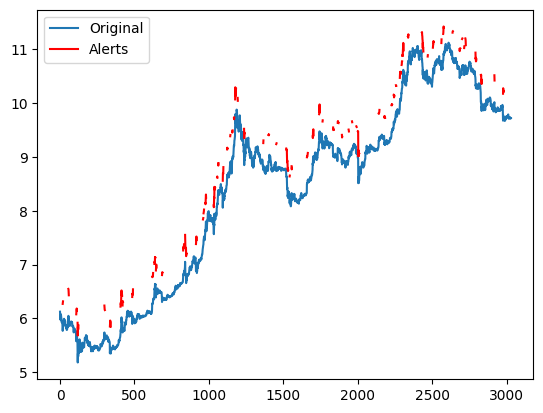

In [198]:
plt.plot(original_plot, label='Original')

y_outlier_plot=[]
calculate_variance(data,0.02,2)

plt.plot(y_outlier_plot, label='Alerts',color='r')

plt.legend(loc='best')
plt.show()